# DSCI 100 Project Planning
Manya Garg
<br>75917369

In [1]:
library(tidyverse)
library(repr)
players_url <- "https://raw.githubusercontent.com/ManyaGarg9/project_planning/refs/heads/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/ManyaGarg9/project_planning/refs/heads/main/sessions.csv"

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## (1) Data description: 

### Players dataset: 
The Players dataset contains 196 observations and 7 variables. It contains data about different players across categories like player experience, subscription to the newsletter, their emails which have been hashed, number of hours they played and demographic information like their names, gender and age. 

| Variable | Description | Type |
| ------------- | ----------------------------------- | ------- |
| experience | Player's experience in the game | Character
| subscribe | Whether or not the players have subscibed to the newsletter | Logical |
| hashedEmail | Hashed version of the player's email addresses | Character|
| played_hours | Number of hours players spent playing the game | Double |
| name | Player's names | Character |
| gender | Player's genders | Character | 
| Age | Player's Age | Double |

The data needs to be wrangled before it can be used since most of the variables are character and logical types and there are observations with missing values which can affect our predictions.

### Sessions dataset: 

The sessions dataset has 1535 observations and 5 variables containing player's hashed emails and their start and end times.

| Variable | Description | Type |
| ------------- | ----------------------------------- | ------- |
| hashedEmail | Hashed version of the player's email addresses | Character|
| start_time | Time when players started in date-time format | Character |
| end_time | Time when players ended in date-time format | Character |
| original_start_time | UNIX time when players started | Double | 
| original_end_time | UNIX time when players ended | Double |

The start and end time data here needs to be separated into two separate columns containing date and time since each column is supposed to have only one variable to make the data tidy. 

## (2) Questions: 

The broad question that I'll be working on is the player's characteristics and behaviours that are most predictive of subscribing to a game-related newsletter where I'll be exploring the relationship between the number of hours individuals played the game and whether or not they subscribed to the newsletter to figure out if the number of hours spent playing the game can predict whether the individual subscribed to the newsletter. I'll also be trying to see if this relationship varies for players with different experience levels. 

## (3) Exploratory Data Analysis and Visualization:

In [2]:
players <- read_csv(players_url)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Since I'll be focusing primarily on the experience, subscribe and played_hours variables, I will keep the dataset with only these variables. 

In [3]:
players_1 <- players |> 
        select(experience, subscribe, played_hours) 
head(players_1)

experience,subscribe,played_hours
<chr>,<lgl>,<dbl>
Pro,TRUE,30.3
Veteran,TRUE,3.8
Veteran,FALSE,0.0
Amateur,TRUE,0.7
Regular,TRUE,0.1
Amateur,TRUE,0.0


Mean for the quantitative variables in players dataset: 

In [4]:
players |> select(played_hours, Age) |> map_dfr(mean, na.rm = TRUE)

played_hours,Age
<dbl>,<dbl>
5.845918,20.52062


First, I want to understand the relationship between the number of hours people play the game and if they choose to subscribe to the game-related newsletter. 

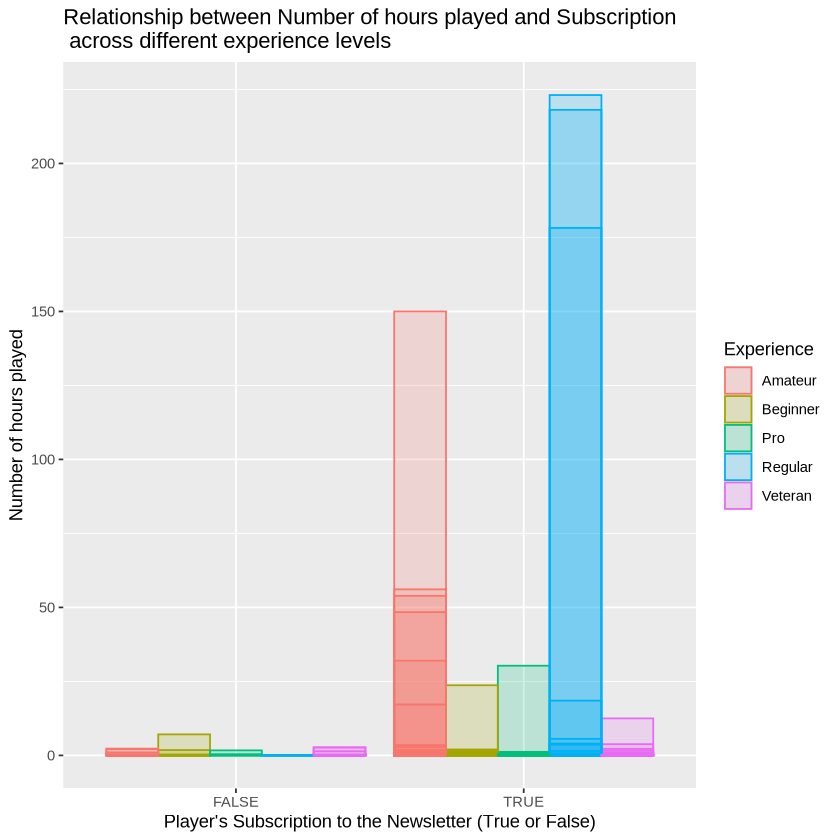

In [5]:
players_plot <- players_1 |> 
        ggplot(aes(x = subscribe, y = played_hours, colour = experience, fill = experience)) +
        geom_bar(stat = "identity", position = "dodge", alpha = 0.2) +
        labs(x = "Player's Subscription to the Newsletter (True or False)", y = "Number of hours played", 
             colour = "Experience",fill = "Experience", 
             title = "Relationship between Number of hours played and Subscription \n across different experience levels")
players_plot

We can see from the graph that people who play the game for a large number of hours usually subscribe to the newsletter across all experience levels but the clumping of bars near 0 also tells us that many people who did not play the game for a large number of hours also subscribed to the newsletter. Also, people who did not subscribe to the newsletter generally did not play the game for a long time. 

As we can see, there is a lot more data for the people who have subscribed for the newsletter. This is because of the disproportion between the people who have subscribed for newsletter and those who did in the data. 

In [6]:
players_2 <- players |> 
        select(experience, subscribe, played_hours) |>
        group_by(subscribe) |> 
        summarize(count = n())
head(players_2)

subscribe,count
<lgl>,<int>
FALSE,52
TRUE,144


`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


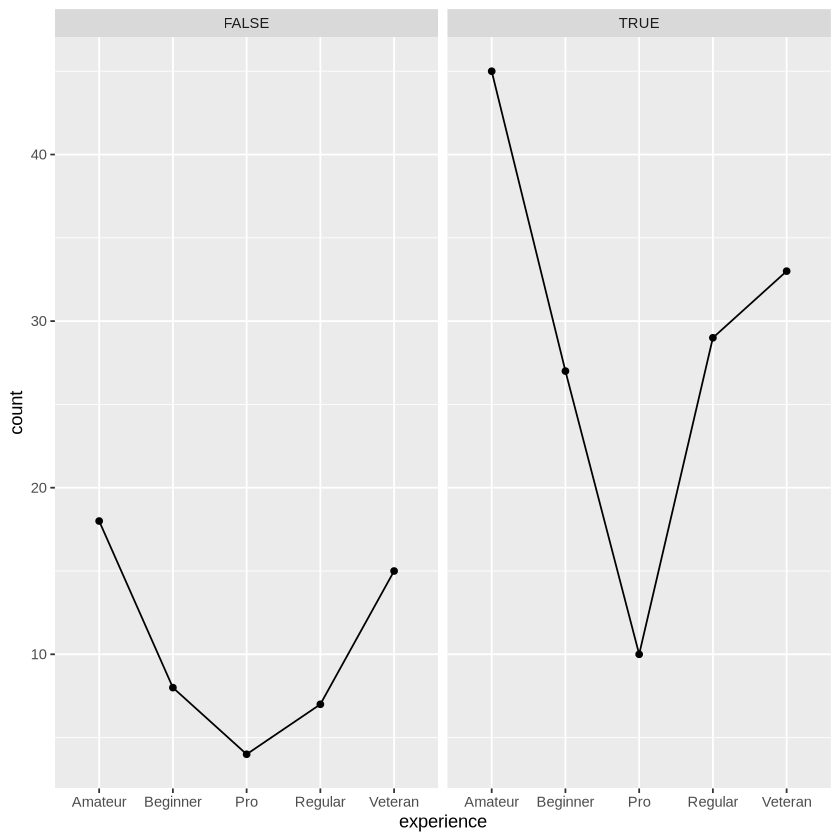

In [7]:
players_3 <- players_1 |> group_by(experience,subscribe) |> summarise(count = n())
players_3_plot <- players_3 |> ggplot(aes(x = experience, y = count)) +
   geom_point() + geom_line(aes(group = 1)) +
   facet_grid(cols = vars(subscribe))
players_3_plot

Therefore, the total number of people who subscribed to the newsletter is almost thrice the number of people who didn't and the data continues to be unbalanced across different experience levels as well. This can show misleading results when making predictions but this can be handled by undersampling or oversampling the data. We can also evaluate the precision or recall for our classifier instead of the accuracy for a better evaluation of its performance.  

## (4) Methods and Plan:

I’ll be using the k-neighbours classification model to predict whether or not a player would want to subscribe to the newsletter depending on the number of hours they’ve played the game. Since the prediction would either be true or false, the classification model would be appropriate and given that the data has less than 200 observations, k-neighbours classification would be able to give an accurate picture of the relationship between the two variables. I will also assess whether this relationship differs for people with different experience levels, however, given the limited amount of data, the true variation between them may not become easily apparent. For this, the data will be split equally into training and testing sets and then the model will be tuned by resampling the training data so that the proportion of true and false responses for the subscription variable are equal and using cross-validation to find the best k for the results and then using that for predictions. 
